In [2]:
import pandas as pd
#Importing the dataset
data=pd.read_csv("IEA GEVO 2023 data.csv")
#Head of the dataset
print("The head of the dataset is:\n",data.head(5),'\n')
#Instances
print("There are ",len(data.axes[0])," instances")

The head of the dataset is:
       region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
1  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
2  Australia  Historical  EV sales share  Cars         EV  2011   percent   
3  Australia  Historical  EV stock share  Cars         EV  2011   percent   
4  Australia  Historical  EV stock share  Cars         EV  2012   percent   

      value  
0  49.00000  
1  49.00000  
2   0.00650  
3   0.00046  
4   0.00280   

There are  10079  instances


In [3]:
year_to_delete=[2010,2011,2012,2025,2030]
df=data.loc[~data['year'].isin(year_to_delete)]

#Deleting regions which are not applicable for analysis
region_to_delete=['EU27','Other Europe','Rest of the world','World']
df=df.loc[~df['region'].isin(region_to_delete)]

#Deleting parameters which are not applicable for analysis
parameter_to_delete=['EV sales share', 'EV stock share','EV stock','Oil displacement, million lge','Oil displacement Mbd','EV charging points','Electricity demand']
df=df.loc[~df['parameter'].isin(parameter_to_delete)]

#Deleting categorys which are not applicable for analysis
category_to_delete=['Projection-STEPS','Projection-APS']
df=df.loc[~df['category'].isin(category_to_delete)]
print(df)

         region    category parameter  mode powertrain  year      unit  \
10    Australia  Historical  EV sales  Cars        BEV  2013  Vehicles   
11    Australia  Historical  EV sales  Cars       PHEV  2013  Vehicles   
20    Australia  Historical  EV sales  Cars       PHEV  2014  Vehicles   
21    Australia  Historical  EV sales  Cars        BEV  2014  Vehicles   
22    Australia  Historical  EV sales  Cars        BEV  2015  Vehicles   
...         ...         ...       ...   ...        ...   ...       ...   
8902        USA  Historical  EV sales  Cars        BEV  2020  Vehicles   
8951        USA  Historical  EV sales  Cars        BEV  2021  Vehicles   
8956        USA  Historical  EV sales  Cars       PHEV  2021  Vehicles   
8959        USA  Historical  EV sales  Cars       PHEV  2022  Vehicles   
8964        USA  Historical  EV sales  Cars        BEV  2022  Vehicles   

         value  
10       190.0  
11       100.0  
20       950.0  
21       370.0  
22       760.0  
...      

In [4]:
df = df.groupby('year')['value'].sum().reset_index()

In [5]:
df

,year,value
0,2013,2.881130e+05
1,2014,4.576780e+05
2,2015,9.099040e+05
3,2016,1.121243e+06
4,2017,1.731703e+06
5,2018,2.651572e+06
6,2019,2.864301e+06
7,2020,4.529404e+06
8,2021,9.025455e+06
9,2022,1.309026e+07


In [6]:
#pip install pmdarima

In [7]:
import pmdarima as pm

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

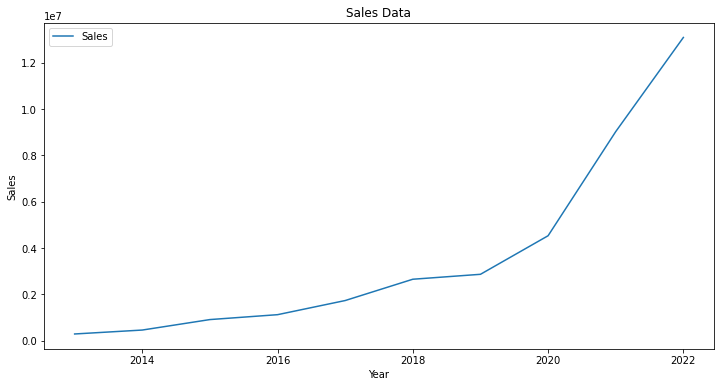

In [9]:
# Set 'year' as the index
#df.set_index('year', inplace=True)

# Visualize your data to understand its characteristics
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['value'], label='Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Data')
plt.legend()
plt.show()

In [10]:
# Specify ARIMA model orders (p, d, q)
p = 1  # AR order
d = 1  # Integration order (for differencing)
q = 1  # MA order
X=df['year']
y=df['value']
# Fit the ARIMA model
model = ARIMA(y, order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

C:\Users\pc7\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -138.316
Date:                Mon, 30 Oct 2023   AIC                            282.632
Time:                        14:53:55   BIC                            283.224
Sample:                             0   HQIC                           281.355
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7572      0.943      0.803      0.422      -1.091       2.605
ma.L1          0.7351      1.073      0.685      0.493      -1.369       2.839
sigma2      2.127e+12   2.96e-13   7.19e+24      0.0

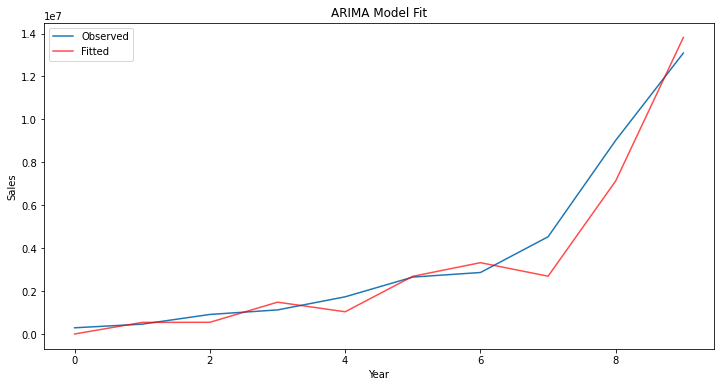

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='Observed')
plt.plot(df.index, results.fittedvalues, color='red', label='Fitted', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()

In [12]:
forecast_years = 5  # Specify the number of steps (years) to forecast
forecast = results.get_forecast(steps=forecast_years)

In [13]:
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast_mean

10    1.563502e+07
11    1.756191e+07
12    1.902094e+07
13    2.012570e+07
14    2.096223e+07
Name: predicted_mean, dtype: float64

In [14]:
print("Forecasted Sales:")
print(forecast_mean.tail(forecast_years))

Forecasted Sales:
10    1.563502e+07
11    1.756191e+07
12    1.902094e+07
13    2.012570e+07
14    2.096223e+07
Name: predicted_mean, dtype: float64


In [15]:
from dateutil.relativedelta import relativedelta

In [16]:
df.set_index('year', inplace=True)

In [17]:
df.index = pd.to_datetime(df.index, format='%Y')

In [18]:
last_year = df.index[-1].year
next_year_date = last_year + 1

In [19]:
next_years_range = pd.date_range(start=f"{next_year_date}-01-01", periods=forecast_years, freq='AS')

In [20]:
print("Next 5 Years and Predicted Sales:")
for year, sales_pred in zip(next_years_range, forecast_mean):
    print(f"Year: {year.year}, Predicted Sales: {sales_pred:.2f}")

Next 5 Years and Predicted Sales:
Year: 2023, Predicted Sales: 15635024.54
Year: 2024, Predicted Sales: 17561909.12
Year: 2025, Predicted Sales: 19020935.40
Year: 2026, Predicted Sales: 20125701.99
Year: 2027, Predicted Sales: 20962225.10


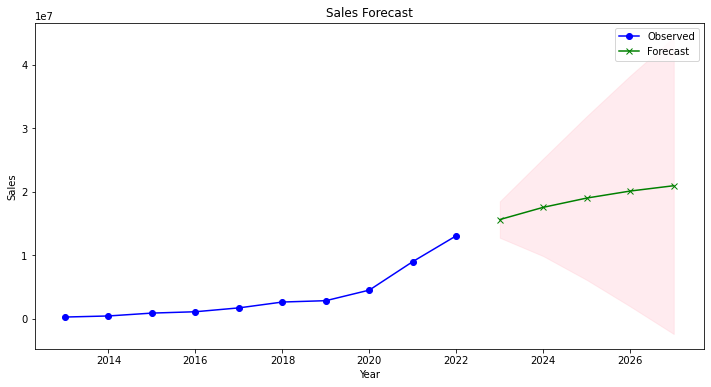

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='Observed', marker='o', color='blue')
plt.plot(next_years_range, forecast_mean.values, label='Forecast', marker='x', color='green')
plt.fill_between(next_years_range, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()

In [22]:
result=results.fittedvalues

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have actual sales data for the testing period in a DataFrame 'actual_df'
# 'forecast_mean' contains your forecasted values
actual_sales = df['value']  # Replace 'sales' with the actual column name

# Calculate MAE
mae = mean_absolute_error(actual_sales, result)

# Calculate MSE
mse = mean_squared_error(actual_sales, result)

# Calculate RMSE
rmse = np.sqrt(mse)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 674378.11
Mean Squared Error (MSE): 853478713648.68
Root Mean Squared Error (RMSE): 923839.12


In [24]:
from sklearn.metrics import r2_score
r2=r2_score(actual_sales,result)
r2

0.9464817763969862